# Assignment 3: Image classification

## Instructions

In this assignment, you will be working on the COVID-19 lung X-Ray dataset. It consists of X-ray images that are labeled as either "Normal" or "Covid", with the latter indicating an X-ray of a COVID-19 patient.

To predict if a person has COVID or not, you will train the following five different classification models, finetune their hyperparameters, and finally select the best model and test it on the test data.

1.   Decision Tree
2.   Gradient Boosting
3.   Random Forest
4.   Support Vector Machines
5.   Neural Netwroks

The dataset can be found here: [Covid 19 X-Ray Dataset](https://drive.google.com/drive/folders/1Nwa6L58NwF23PvImpDrp-W8oTOheu_b3?usp=sharing). The data is already split into training, validation, and test.

To help you with this assignment, you are provided some instructions to follow, we will be checking those criteria when evaluating your submissions.

## Part 1: Data Exploration

In [1]:
# load the dataset
from google.colab import drive
drive.mount('/content/drive')

In [2]:
# define the path for training, testing and validation datasets
train_dir = "/content/drive/MyDrive/Classroom/Training"
val_dir = "/content/drive/MyDrive/Classroom/Validation"
test_dir = "/content/drive/MyDrive/Classroom/Testing"

# train_dir = "./Dataset/Training"
# val_dir = "./Dataset/Validation"
# test_dir = "./Dataset/Testing"

Since we are dealing with folders and subfolders, it's crucial to use the os library so that we will be able to use the

```
# os.path.join(folder, 'destination directory name')
```

where the destination will be either "COVID" or "Normal".



In [3]:
# import libaries
import os

# Function to count samples in each folder
def count_samples(folder):
    covid_path = os.path.join(folder, 'COVID')
    normal_path = os.path.join(folder, 'Normal')
    num_covid = len(os.listdir(covid_path))
    num_normal = len(os.listdir(normal_path))
    return num_covid, num_normal

# count samples in each folder
train_covid, train_normal = count_samples(train_dir)
test_covid, test_normal = count_samples(test_dir)
val_covid, val_normal = count_samples(val_dir)

# output the counts
print("Number of samples in each folder:")
print("Number of samples in each folder:")
print("Training - COVID:", train_covid)
print("Training - Normal:", train_normal)
print("Validation - COVID:", val_covid)
print("Validation - Normal:", val_normal)
print("Testing - COVID:", test_covid)
print("Testing - Normal:", test_normal)

Number of samples in each folder:
Number of samples in each folder:
Training - COVID: 200
Training - Normal: 200
Validation - COVID: 50
Validation - Normal: 50
Testing - COVID: 25
Testing - Normal: 25


Your next step is to visualize some of the data that you have. When we were dealing with a dataframe, it was easier for us to visualize some samples since the dataframe have a head and many other functions to get the job done.

In our case, we are dealing with images. The simplest option is to check the folder from your drive but we need to see it inside the model here.

To do that, you should use the cv2 library and use the method

```
cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
```
so that we can read an image that is in grayscale.


In addition, the image should be in a viewable format, so we need to plot then show the image using the matplotlib library.


Visualizing 2 COVID images from Training folder:


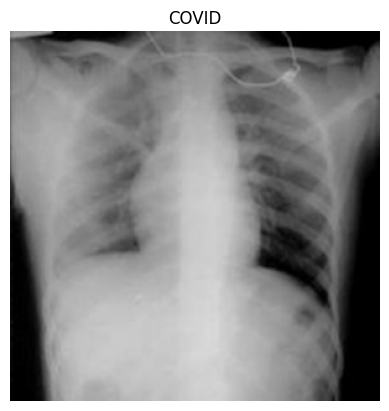

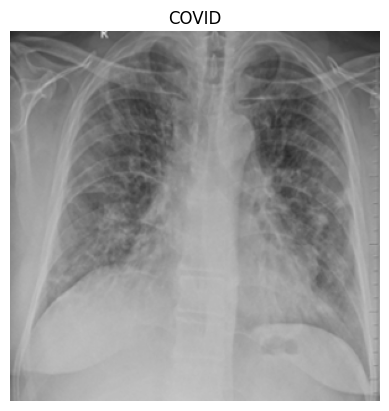


Visualizing 2 Normal images from Training folder:


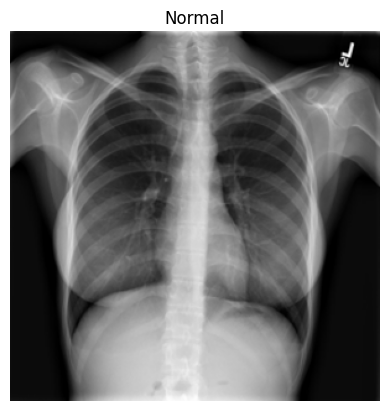

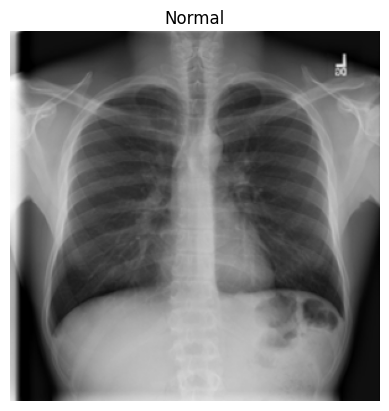


Visualizing 2 COVID images from Testing folder:


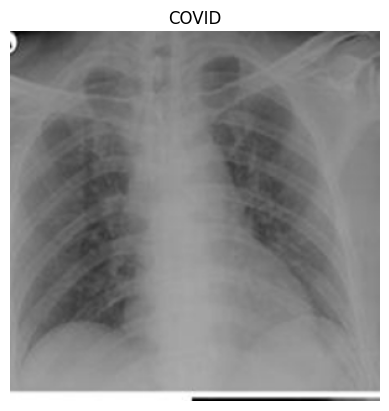

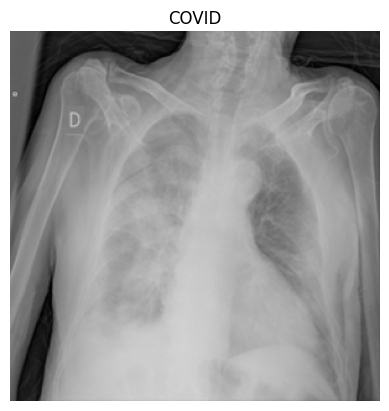


Visualizing 2 Normal images from Testing folder:


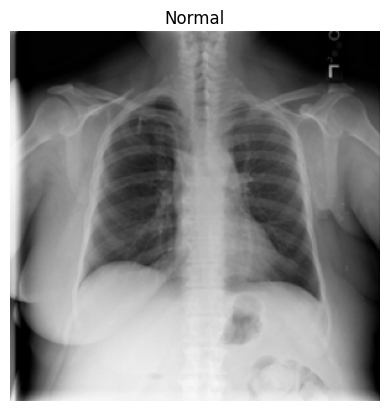

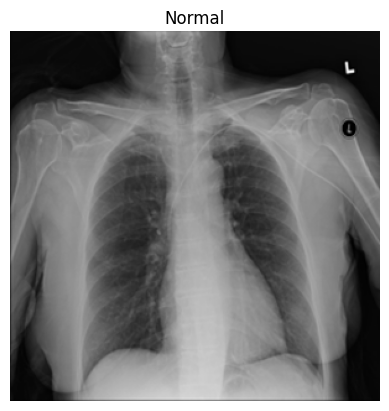


Visualizing 2 COVID images from Validation folder:


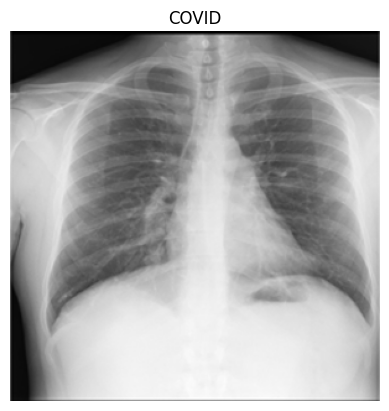

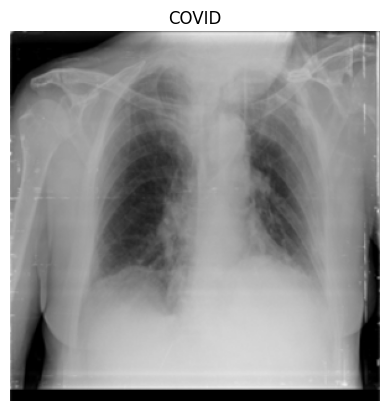


Visualizing 2 Normal images from Validation folder:


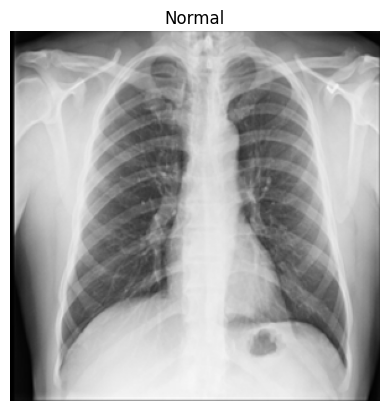

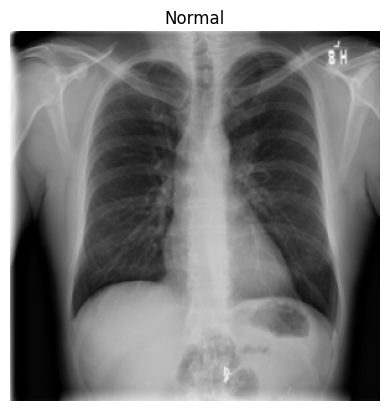

In [4]:
# import libaries
import cv2
import matplotlib.pyplot as plt

# function to visualize images from each folder
def visualize_images(folder, label, num_samples=2):
    covid_path = os.path.join(folder, 'COVID')
    normal_path = os.path.join(folder, 'Normal')

    # visualize COVID images
    covid_images = os.listdir(covid_path)[:num_samples]
    print(f"\nVisualizing {num_samples} COVID images from {label} folder:")
    for img_name in covid_images:
        img_path = os.path.join(covid_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title("COVID")
        plt.axis('off')
        plt.show()

    # visualize Normal images
    normal_images = os.listdir(normal_path)[:num_samples]
    print(f"\nVisualizing {num_samples} Normal images from {label} folder:")
    for img_name in normal_images:
        img_path = os.path.join(normal_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title("Normal")
        plt.axis('off')
        plt.show()

# visualize images from each folder
visualize_images(train_dir, "Training")
visualize_images(test_dir, "Testing")
visualize_images(val_dir, "Validation")

## Part 2: Data Preparation

Since we are dealing with images and folders, and since we know that we do not have a dataframe to choose from, we need to present our folders and images in a suitable format for the different models.

To do that, we will be use the method

```
load_images_from_folder()
```
that will take as parameters the folder path and the label, and return 2 arrays, one for the features (which are the images) and one for the labels.

To build this method, we need at first to initiate 2 empty arrays to hold the new values that we will be working with and we need to make a dictionnary to map the labels COVID and Normal to numeric values (0 and 1).

Next, we need to loop over the images inside each folder and do the following:

1.   Read the image
2.   Convert each image to grayscale
3.   Normalize the pixels values between 0 and 1
4.   Flatten the image
5.   Append the image and its label to the correspondng arrays


In [5]:
# import libaries
import numpy as np

def load_images_from_folder(folder_path, label, target_size=(100, 100)):
    images = []
    labels = []
    label_dict = {'COVID': 0, 'Normal': 1}  # Define a dictionary to map labels to numeric values
    label_code = label_dict[label]

    label_path = os.path.join(folder_path, label)
    for img_name in os.listdir(label_path):
        img_path = os.path.join(label_path, img_name)
        # load the image
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale
        # resize the image
        img_resized = cv2.resize(img, target_size)  # Resize the image to the specified target size
        # preprocess the resized image (e.g., normalize pixel values)
        img_resized = img_resized.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
        # flatten the resized image
        img_flat = img_resized.flatten()
        # append the flattened image and corresponding label
        images.append(img_flat)
        labels.append(label_code)
    return np.array(images), np.array(labels)


Next, call this method for all the folders you have to prepare your data for training.

In [6]:
# load images from the training folder for both COVID and Normal labels
train_covid_images, train_covid_labels = load_images_from_folder(train_dir, 'COVID')
train_normal_images, train_normal_labels = load_images_from_folder(train_dir, 'Normal')

# load images from the testing folder for both COVID and Normal labels
test_covid_images, test_covid_labels = load_images_from_folder(test_dir, 'COVID')
test_normal_images, test_normal_labels = load_images_from_folder(test_dir, 'Normal')

# load images from the validation folder for both COVID and Normal labels
val_covid_images, val_covid_labels = load_images_from_folder(val_dir, 'COVID')
val_normal_images, val_normal_labels = load_images_from_folder(val_dir, 'Normal')

In [7]:
train_covid_images.shape

(200, 10000)

In [8]:
# combine COVID and Normal images and labels for training, validation and test
train_images = np.concatenate((train_covid_images, train_normal_images), axis=0)
train_labels = np.concatenate((train_covid_labels, train_normal_labels), axis=0)

val_images = np.concatenate((val_covid_images, val_normal_images), axis=0)
val_labels = np.concatenate((val_covid_labels, val_normal_labels), axis=0)

test_images = np.concatenate((test_covid_images, test_normal_images), axis=0)
test_labels = np.concatenate((test_covid_labels, test_normal_labels), axis=0)


In [9]:
from sklearn.model_selection import train_test_split

def plot_learning_curve(model, X, y, cv=5, train_sizes=np.linspace(.1, 1.0, 10)):
    """
    Plots the learning curve for a given model.
    :param model: The machine learning model
    :param X: Input features
    :param y: Target labels
    :param cv: Number of cross-validation folds
    :param train_sizes: Relative or absolute numbers of training examples that will be used to generate the learning curve.
    """
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, train_sizes=train_sizes, n_jobs=1)

    # calculate mean and standard deviation for training set scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)

    # calculate mean and standard deviation for test set scores
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

## Part 3: Models


### Decision Tree

Train a Decision Tree model using the default hyperparameters and evaluate its performance on the validation set

In [10]:
# import libaries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# initialize and train the decision tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(train_images, train_labels)

# predict labels for the validation set
dt_val_predictions = dt_model.predict(val_images)

# report the validation accuracy of the trained model
dt_accuracy = accuracy_score(val_labels, dt_val_predictions)
print(f'Validation Accuracy: {dt_accuracy:.4f}')

Validation Accuracy: 0.8800


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Combine train and validation sets for plotting the learning curve
X = np.concatenate((train_images, val_images), axis=0)
y = np.concatenate((train_labels, val_labels), axis=0)

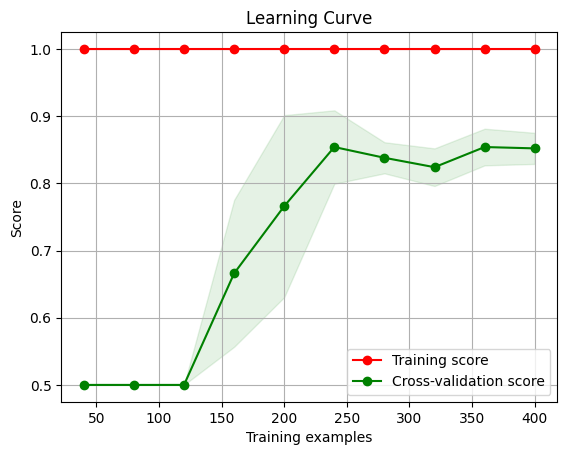

In [12]:
plot_learning_curve(dt_model, X, y, cv=5)
plt.show()

Does your model suffer from overfitting (high variance) or underfitting (high bias) or neither and why?

Answer: High variance due to very high training score (overfitting)

#### Hyperparameter tuning

Use the **GridSearchCV** module of the **sklearn** library to tune the hyperparameter of your Decision Tree model on the validation set. You should try to tune as many hyperparameters as you can, such as split criterion, maximum depth, etc. Your tuning should be guided by the observations you made from the learning curve of the untuned model.   

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
dt = DecisionTreeClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 4, 6], 
    'min_samples_leaf': [1, 3, 5],  
    'max_features': ['sqrt', 'log2'],  
    'class_weight': [None, 'balanced'] 
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(train_images, train_labels)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

# evaluate the best model on the validation set
best_model = grid_search.best_estimator_
dt_val_predictions = best_model.predict(val_images)
dt_val_accuracy = accuracy_score(val_labels, dt_val_predictions)
print(f'Validation accuracy of the best model: {dt_val_accuracy:.4f}')

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Best parameters found:  {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 4}
Best cross-validation score: 0.9049
Validation accuracy of the best model: 0.8500


### Gradient Boosting

Train a Gradient Boosting model using the default hyperparameters and validate it on the validation set.



In [14]:
# import libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# initialize and train the Gradient Boosting model
gb = GradientBoostingClassifier()
gb.fit(train_images, train_labels)

# predict labels for the validation set
gb_val_predictions = gb.predict(val_images)

# report the validation accuracy of the trained model
gb_accuracy = accuracy_score(val_labels, gb_val_predictions)
print(f'Validation Accuracy: {gb_accuracy:.4f}')

Validation Accuracy: 0.9400


C:\Users\osama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
17 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
17 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\osama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\osama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\osama\AppData\Local\Programs\Python\Python310\lib\site-package

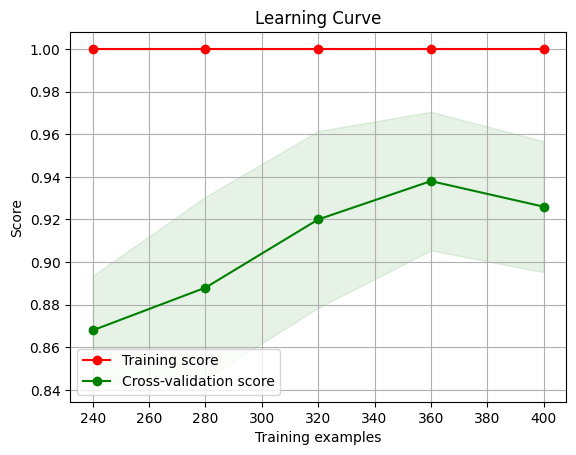

In [15]:
# plot the learning curve of the trained model to examine bias and variance

plot_learning_curve(gb, X, y, cv=5)
plt.show()

Does your model suffer from overfitting (high variance) or underfitting (high bias) or neither and why?

Answer: The model appears to be overfitting (high variance), as shown by the high training score and the significant but decreasing gap to the cross-validation score.

#### Hyperparameter tuning

Use the **GridSearchCV** module of the **sklearn** library to tune the hyperparameter of your Gradient Boosting model on the validation set. You should try to tune as many hyperparameters as you can, such as criterion, maximum depth, learning rate, number of estimators, etc. Your tuning should be guided by the observations you made from the learning curve of the untuned model.

In [16]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the model to use the GPU
gbm = xgb.XGBClassifier(device='gpu')

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 2],  # This is the minimum sum of instance weight (hessian) needed in a child.
    'subsample': [0.8, 1],  # Subsample ratio of the training instances.
    'colsample_bytree': [0.8, 1],  # Subsample ratio of columns when constructing each tree.
}


grid_search_gbm = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=3, verbose=2, scoring='accuracy', n_jobs=1)
grid_search_gbm.fit(train_images, train_labels)

print("Best parameters found: ", grid_search_gbm.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search_gbm.best_score_))

# Evaluate the best model on the validation set
best_gbm_model = grid_search_gbm.best_estimator_
val_predictions_gbm = best_gbm_model.predict(val_images)
val_accuracy_gbm = accuracy_score(val_labels, val_predictions_gbm)
print(f'Validation accuracy of the best Gradient Boosting model: {val_accuracy_gbm:.4f}')

Fitting 3 folds for each of 144 candidates, totalling 432 fits


C:\Users\osama\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [13:44:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   3.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1; total time=   2.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1; total time=   2.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1; total time=   2.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   2.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   3.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1; total time=   3.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1; total time=   3.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1; total time=   3.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.8; total time=   5.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1; total time=   2.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1; total time=   2.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1; total time=   2.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   3.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1; total time=   3.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, 

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1; total time=   1.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1; total time=   2.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1; total time=   2.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1; total time=   2.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, 

[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8; total time=  15.3s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8; total time=  16.8s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1; total time=  19.3s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1; total time=  16.8s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1; total time=  18.4s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   7.0s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   6.4s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, min_ch

[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1; total time=   5.0s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1; total time=   4.7s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1; total time=   5.0s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   6.2s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   5.0s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   6.2s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1; total time=   6.6s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, min_child_weight

[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   2.9s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1; total time=   2.8s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1; total time=   2.7s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1; total time=   2.9s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=3, min_child_weig

### Random Forest

Train a Random Forest model using the default hyperparameters and validate it on the validation set.


In [17]:
# import libaries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# initialize the Random Forest model
rf = RandomForestClassifier()

# train the Random Forest model
rf.fit(train_images, train_labels)

# predict labels for the validation set
rf_val_predictions = rf.predict(val_images)

# report the validation accuracy of the trained model
rf_accuracy = accuracy_score(val_labels, rf_val_predictions)
print(f'Validation Accuracy: {rf_accuracy:.4f}')

Validation Accuracy: 0.9400


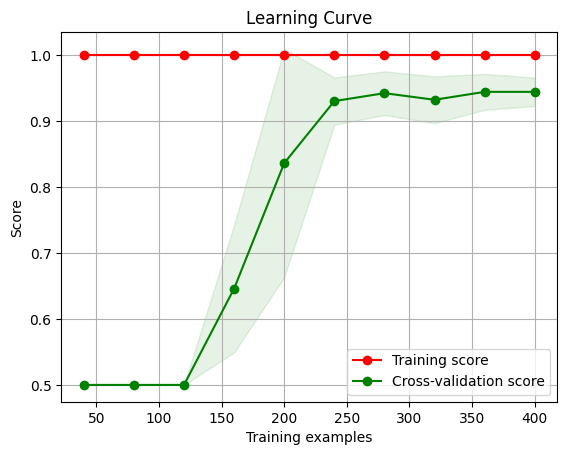

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier

# plot the learning curve of the trained model to examine bias and variance

plot_learning_curve(rf, X, y, cv=5)
plt.show()

Does your model suffer from overfitting (high variance) or underfitting (high bias) or neither and why?

Answer: Neither as the plateauing (curves getting nearer at the end) of the validation score near the training score with a smaller gap suggests that the random forest model is neither suffering from significant high variance nor high bias.

#### Hyperparameter tuning

Use the **GridSearchCV** module of the **sklearn** library to tune the hyperparameter of your decision tree model on the validation set. You should try to tune as many hyperparameters as you can, such as split criterion, maximum depth, etc. Your tuning should be guided by the observations you made from the learning curve of the untuned model. Your tuning should be guided by the observations you made from the learning curve of the untuned model.

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200], 
    'criterion': ['gini', 'entropy'], 
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5],  
    'min_samples_leaf': [1, 2, 4], 
    'max_features': [None, 'sqrt', 'log2'],
}

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search_rf.fit(train_images, train_labels)

print("Best parameters found: ", grid_search_rf.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search_rf.best_score_))

# evaluate the best model on the validation set
best_rf_model = grid_search_rf.best_estimator_
val_predictions_rf = best_rf_model.predict(val_images)
val_accuracy_rf = accuracy_score(val_labels, val_predictions_rf)
print(f'Validation accuracy of the best Random Forest model: {val_accuracy_rf:.4f}')

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score: 0.9499
Validation accuracy of the best Random Forest model: 0.9400


### Support Vector Machines

Train a linear Support Vector Machines model using the default hyperparameters and validate it on the validation set.

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# initialize and train the Support Vector Machines model
svm_model = SVC()
svm_model.fit(train_images, train_labels)

# report the number of support vectors for each class
n_support_vectors = svm_model.n_support_
print(f'Number of support vectors for each class: {n_support_vectors}')

# predict labels for the validation set
svm_val_predictions = svm_model.predict(val_images)

# report the validation accuracy of the trained model
svm_accuracy = accuracy_score(val_labels, svm_val_predictions)
print(f'Validation Accuracy: {svm_accuracy:.4f}')

Number of support vectors for each class: [59 61]
Validation Accuracy: 0.9700


C:\Users\osama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
17 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
17 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\osama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\osama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\osama\AppData\Local\Programs\Python\Python310\lib\site-package

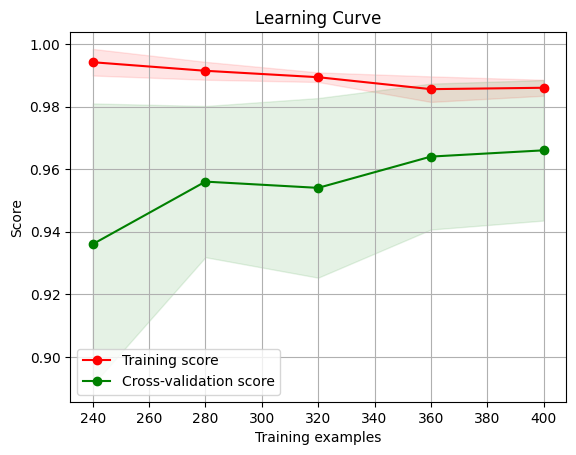

In [22]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

# plot the learning curve of the trained model to examine bias and variance

plot_learning_curve(svm_model, X, y, cv=5)
plt.show()

Does your model suffer from overfitting (high variance) or underfitting (high bias) or neither and why?

Answer: Slight overfitting (not so high variance / neither) because the cross-validation score is increasing and the gap between the training and validation scores is not very wide or increasing, thus, the svm model is likely not suffering from severe high variance.

#### Hyperparameter tuning

Use the **GridSearchCV** module of the **sklearn** library to tune the hyperparameter of your Support Vector Machines model on the validation set. You should try to tune as many hyperparameters as you can, such as the regularization parameter C, the kernel, the degree of polynomial kernels, and the gamma parameter. Your tuning should be guided by the observations you made from the learning curve of the untuned model.

In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the model
svc = SVC()

param_grid = {
    'C': [0.1, 1, 10], 
    'kernel': ['linear', 'rbf', 'poly'],  
    'degree': [2, 3, 4], 
    'gamma': ['scale', 'auto'], 
}

grid_search_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv=3, verbose=2, scoring='accuracy')
grid_search_svc.fit(train_images, train_labels)

print("Best parameters found: ", grid_search_svc.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search_svc.best_score_))

# evaluate the best model on the validation set
best_svc_model = grid_search_svc.best_estimator_
val_predictions_svc = best_svc_model.predict(val_images)
val_accuracy_svc = accuracy_score(val_labels, val_predictions_svc)
print(f'Validation accuracy of the best SVM model: {val_accuracy_svc:.4f}')

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   0.4s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   0.4s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   0.4s
[CV] END ..........C=0.1, degree=2, gamma=scale, kernel=poly; total time=   0.1s
[CV] END ..........C=0.1, degree=2, gamma=scale, kernel=poly; total time=   0.1s
[CV] END ..........C=0.1, degree=2, gamma=scale, kernel=poly; total time=   0.1s
[CV] END .........C=0.1, degree=2, gamma=auto, kernel=linear; total time=   0.1s
[CV] END .........C=0.1, degree=2, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .........C=0.1, degree=2, gamma=auto, 

[CV] END ..............C=1, degree=4, gamma=auto, kernel=rbf; total time=   0.4s
[CV] END ..............C=1, degree=4, gamma=auto, kernel=rbf; total time=   0.3s
[CV] END ..............C=1, degree=4, gamma=auto, kernel=rbf; total time=   0.3s
[CV] END .............C=1, degree=4, gamma=auto, kernel=poly; total time=   0.5s
[CV] END .............C=1, degree=4, gamma=auto, kernel=poly; total time=   0.5s
[CV] END .............C=1, degree=4, gamma=auto, kernel=poly; total time=   0.5s
[CV] END .........C=10, degree=2, gamma=scale, kernel=linear; total time=   0.1s
[CV] END .........C=10, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .........C=10, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ............C=10, degree=2, gamma=scale, kernel=rbf; total time=   0.2s
[CV] END ............C=10, degree=2, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END ............C=10, degree=2, gamma=scale, kernel=rbf; total time=   0.2s
[CV] END ...........C=10, de

### Feed-forward Neural Network

In [ ]:
# !pip uninstall keras.wrappers
# !pip uninstall tensorflow
# !pip uninstall scikeras
# !pip uninstall keras

# # install necessary libraries if needed
# !pip install keras.wrappers
# !pip install tensorflow
# !pip install scikeras
# !pip install keras

Train a Feed-forward Neural Network consisting of three layers. The first hidden layer has 128 units and uses the ReLU activation function, the second hidden layer has 64 units and uses the ReLU activation function, and the output layer has 1 unit and uses sigmoid activation for binary classification. Use the Adam optimizer to train the neural network, and then validate your model using the validation set.

In [24]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from scikeras.wrappers import KerasClassifier
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping

# function to create a dense model
def create_dense_model(input_shape):
    model = Sequential([
        Flatten(input_shape=input_shape),  # Flatten the input images
        Dense(128, activation='relu'),  # First hidden layer with 128 units and ReLU activation
        Dense(64, activation='relu'),   # Second hidden layer with 64 units and ReLU activation
        Dense(1, activation='sigmoid')  # Output layer with 1 unit and sigmoid activation for binary classification
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# function to extract the dense model from the pipeline
def extract_model(pipeline):
    return pipeline.steps[-1][1]

# support early stopping for the dense model to avoid overfitting
early_stopping = EarlyStopping(
    monitor='accuracy',
    patience=16, 
    restore_best_weights=True
)

# create a pipeline for the dense model
dense_pipeline = Pipeline([
    ('flatten', FunctionTransformer(lambda x: x.reshape((x.shape[0], -1)))),
    ('dense', KerasClassifier(
        model=create_dense_model, 
        input_shape=(10000,), 
        epochs=500, 
        batch_size=32,
        callbacks=[early_stopping]
    ))
])

# train the network
dense_pipeline.fit(train_images, train_labels)

# predict labels for the validation set
nn_val_predictions = dense_pipeline.predict(val_images)

# report the validation accuracy of the trained model
nn_val_accuracy = accuracy_score(val_labels, nn_val_predictions)

print(f'Validation Accuracy: {nn_val_accuracy:.4f}')

Epoch 1/500
13/13 [==============================] - 1s 11ms/step - loss: 1.2257 - accuracy: 0.6275
Epoch 2/500
13/13 [==============================] - 0s 9ms/step - loss: 0.2768 - accuracy: 0.8925
Epoch 3/500
13/13 [==============================] - 0s 9ms/step - loss: 0.1781 - accuracy: 0.9250
Epoch 4/500
13/13 [==============================] - 0s 9ms/step - loss: 0.1606 - accuracy: 0.9375
Epoch 5/500
13/13 [==============================] - 0s 9ms/step - loss: 0.1422 - accuracy: 0.9425
Epoch 6/500
13/13 [==============================] - 0s 8ms/step - loss: 0.1277 - accuracy: 0.9425
Epoch 7/500
13/13 [==============================] - 0s 9ms/step - loss: 0.1305 - accuracy: 0.9425
Epoch 8/500
13/13 [==============================] - 0s 8ms/step - loss: 0.1848 - accuracy: 0.9375
Epoch 9/500
13/13 [==============================] - 0s 8ms/step - loss: 0.2384 - accuracy: 0.8900
Epoch 10/500
13/13 [==============================] - 0s 9ms/step - loss: 0.1606 - accuracy: 0.9375
Epoch 11

Epoch 1/500
2/2 [==============================] - 0s 27ms/step - loss: 1.8639 - accuracy: 0.4800
Epoch 2/500
2/2 [==============================] - 0s 16ms/step - loss: 0.7831 - accuracy: 0.5200
Epoch 3/500
2/2 [==============================] - 0s 0s/step - loss: 0.8596 - accuracy: 0.4800
Epoch 4/500
2/2 [==============================] - 0s 16ms/step - loss: 0.5871 - accuracy: 0.5200
Epoch 5/500
2/2 [==============================] - 0s 17ms/step - loss: 0.6094 - accuracy: 0.6000
Epoch 6/500
2/2 [==============================] - 0s 16ms/step - loss: 0.4466 - accuracy: 0.8800
Epoch 7/500
2/2 [==============================] - 0s 16ms/step - loss: 0.4015 - accuracy: 0.8400
Epoch 8/500
2/2 [==============================] - 0s 23ms/step - loss: 0.3155 - accuracy: 0.9000
Epoch 9/500
2/2 [==============================] - 0s 16ms/step - loss: 0.2918 - accuracy: 0.9000
Epoch 10/500
2/2 [==============================] - 0s 31ms/step - loss: 0.2560 - accuracy: 0.9200
Epoch 11/500
2/2 [===

3/3 [==============================] - 0s 8ms/step - loss: 0.0276 - accuracy: 1.0000
Epoch 42/500
3/3 [==============================] - 0s 8ms/step - loss: 0.0226 - accuracy: 1.0000
Epoch 43/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0232 - accuracy: 1.0000
Epoch 44/500
3/3 [==============================] - 0s 9ms/step - loss: 0.0208 - accuracy: 1.0000
Epoch 45/500
3/3 [==============================] - 0s 8ms/step - loss: 0.0201 - accuracy: 1.0000
Epoch 46/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0198 - accuracy: 1.0000
Epoch 47/500
13/13 [==============================] - 0s 2ms/step
Epoch 1/500
5/5 [==============================] - 1s 12ms/step - loss: 1.5990 - accuracy: 0.5290
Epoch 2/500
5/5 [==============================] - 0s 11ms/step - loss: 0.7753 - accuracy: 0.6667
Epoch 3/500
5/5 [==============================] - 0s 10ms/step - loss: 0.3745 - accuracy: 0.7971
Epoch 4/500
5/5 [==============================] - 0s 8ms/step 

6/6 [==============================] - 0s 12ms/step - loss: 0.1164 - accuracy: 0.9508
Epoch 20/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1241 - accuracy: 0.9399
Epoch 21/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1036 - accuracy: 0.9617
Epoch 22/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1187 - accuracy: 0.9508
Epoch 23/500
6/6 [==============================] - 0s 16ms/step - loss: 0.1152 - accuracy: 0.9672
Epoch 24/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1197 - accuracy: 0.9399
Epoch 25/500
6/6 [==============================] - 0s 10ms/step - loss: 0.1388 - accuracy: 0.9399
Epoch 26/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1376 - accuracy: 0.9235
Epoch 27/500
6/6 [==============================] - 0s 14ms/step - loss: 0.0930 - accuracy: 0.9727
Epoch 28/500
6/6 [==============================] - 0s 15ms/step - loss: 0.1055 - accuracy: 0.9617
Epoch 29/500
6/6 [=====

8/8 [==============================] - 0s 11ms/step - loss: 0.0392 - accuracy: 0.9824
Epoch 53/500
9/9 [==============================] - 0s 4ms/step
Epoch 1/500
9/9 [==============================] - 1s 12ms/step - loss: 0.8226 - accuracy: 0.5919
Epoch 2/500
9/9 [==============================] - 0s 12ms/step - loss: 0.2989 - accuracy: 0.8603
Epoch 3/500
9/9 [==============================] - 0s 12ms/step - loss: 0.1808 - accuracy: 0.9301
Epoch 4/500
9/9 [==============================] - 0s 12ms/step - loss: 0.2025 - accuracy: 0.9007
Epoch 5/500
9/9 [==============================] - 0s 12ms/step - loss: 0.1445 - accuracy: 0.9375
Epoch 6/500
9/9 [==============================] - 0s 13ms/step - loss: 0.1557 - accuracy: 0.9265
Epoch 7/500
9/9 [==============================] - 0s 12ms/step - loss: 0.1425 - accuracy: 0.9375
Epoch 8/500
9/9 [==============================] - 0s 13ms/step - loss: 0.1191 - accuracy: 0.9412
Epoch 9/500
9/9 [==============================] - 0s 13ms/step - 

10/10 [==============================] - 0s 10ms/step - loss: 0.0511 - accuracy: 0.9715
Epoch 28/500
10/10 [==============================] - 0s 10ms/step - loss: 0.0458 - accuracy: 0.9810
Epoch 29/500
10/10 [==============================] - 0s 10ms/step - loss: 0.0441 - accuracy: 0.9810
Epoch 30/500
10/10 [==============================] - 0s 14ms/step - loss: 0.0324 - accuracy: 0.9937
Epoch 31/500
10/10 [==============================] - 0s 14ms/step - loss: 0.0395 - accuracy: 0.9873
Epoch 32/500
10/10 [==============================] - 0s 13ms/step - loss: 0.1132 - accuracy: 0.9430
Epoch 33/500
10/10 [==============================] - 0s 14ms/step - loss: 0.1039 - accuracy: 0.9462
Epoch 34/500
10/10 [==============================] - 0s 11ms/step - loss: 0.1364 - accuracy: 0.9399
Epoch 35/500
10/10 [==============================] - 0s 11ms/step - loss: 0.1912 - accuracy: 0.9177
Epoch 36/500
10/10 [==============================] - 0s 10ms/step - loss: 0.1293 - accuracy: 0.9525
Epo

12/12 [==============================] - 0s 10ms/step - loss: 0.0579 - accuracy: 0.9806
Epoch 41/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0531 - accuracy: 0.9778
Epoch 42/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0348 - accuracy: 0.9861
Epoch 43/500
12/12 [==============================] - 0s 10ms/step - loss: 0.1308 - accuracy: 0.9418
Epoch 44/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0830 - accuracy: 0.9668
Epoch 45/500
5/5 [==============================] - 0s 3ms/step
Epoch 1/500
13/13 [==============================] - 1s 12ms/step - loss: 2.4545 - accuracy: 0.4938
Epoch 2/500
13/13 [==============================] - 0s 11ms/step - loss: 0.5169 - accuracy: 0.7407
Epoch 3/500
13/13 [==============================] - 0s 12ms/step - loss: 0.3379 - accuracy: 0.8543
Epoch 4/500
13/13 [==============================] - 0s 12ms/step - loss: 0.2133 - accuracy: 0.8988
Epoch 5/500
13/13 [=========================

13/13 [==============================] - 0s 11ms/step - loss: 0.0108 - accuracy: 0.9975
Epoch 76/500
13/13 [==============================] - 0s 10ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 77/500
13/13 [==============================] - 0s 10ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 78/500
13/13 [==============================] - 0s 10ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 79/500
13/13 [==============================] - 0s 10ms/step - loss: 0.0092 - accuracy: 0.9975
Epoch 80/500
13/13 [==============================] - 0s 10ms/step - loss: 0.0068 - accuracy: 1.0000
Epoch 81/500
13/13 [==============================] - 0s 10ms/step - loss: 0.0060 - accuracy: 1.0000
Epoch 82/500
3/3 [==============================] - 0s 4ms/step
Epoch 1/500
15/15 [==============================] - 1s 11ms/step - loss: 1.3574 - accuracy: 0.5867
Epoch 2/500
15/15 [==============================] - 0s 11ms/step - loss: 0.3104 - accuracy: 0.8711
Epoch 3/500
15/15 [=======================

15/15 [==============================] - 0s 9ms/step - loss: 0.0169 - accuracy: 0.9956
Epoch 74/500
15/15 [==============================] - 0s 10ms/step - loss: 0.0228 - accuracy: 0.9933
Epoch 75/500
15/15 [==============================] - 0s 9ms/step - loss: 0.0153 - accuracy: 0.9956
Epoch 76/500
15/15 [==============================] - 0s 9ms/step - loss: 0.0149 - accuracy: 0.9911
Epoch 77/500
15/15 [==============================] - 0s 9ms/step - loss: 0.0096 - accuracy: 0.9978
Epoch 78/500
15/15 [==============================] - 0s 9ms/step - loss: 0.0208 - accuracy: 0.9889
Epoch 79/500
15/15 [==============================] - 0s 9ms/step - loss: 0.0214 - accuracy: 0.9933
Epoch 80/500
15/15 [==============================] - 0s 9ms/step - loss: 0.0158 - accuracy: 0.9933
Epoch 81/500
15/15 [==============================] - 0s 9ms/step - loss: 0.0162 - accuracy: 0.9933
Epoch 82/500
15/15 [==============================] - 0s 9ms/step - loss: 0.0128 - accuracy: 0.9956
Epoch 83/500

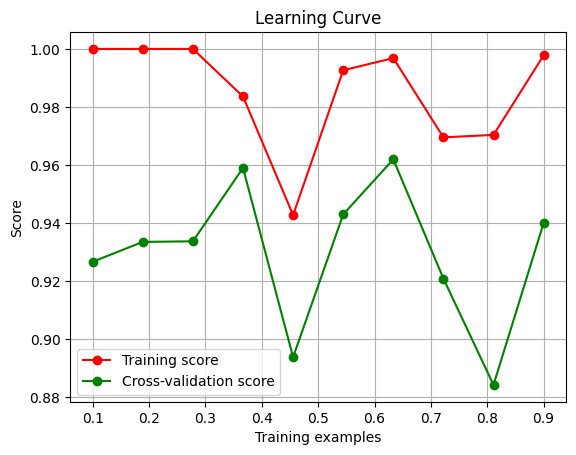

In [29]:
def plot_learning_curve(pipeline, X, y, train_sizes=np.linspace(0.1, 1.0, 10)):
    """
    Plots the learning curve for a given pipeline and dataset.
    
    Parameters:
    - pipeline: The scikit-learn pipeline object.
    - X: Input features.
    - y: Target labels.
    - train_sizes: Relative or absolute numbers of training examples to use to generate the curve.
    """
    train_scores = []
    val_scores = []
    
    for train_size in train_sizes:
        X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=train_size, random_state=42)
        pipeline.fit(X_train, y_train)
        train_score = pipeline.score(X_train, y_train)
        val_score = pipeline.score(X_val, y_val)
        train_scores.append(train_score)
        val_scores.append(val_score)
    
    plt.plot(train_sizes, train_scores, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, val_scores, 'o-', color="g", label="Cross-validation score")
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

plot_learning_curve(dense_pipeline, X, y, train_sizes=np.linspace(0.1, 0.9, 10))
plt.show()

Does your model suffer from overfitting (high variance) or underfitting (high bias) or neither and why?

Answer: the model appears to be suffering from overfitting (high variance) given the consistently high and fluctuating training scores and the fact that the validation score is lower than the training score

#### Hyperparameter tuning

Use the **RandomizedSearchCV** module of the **sklearn** library to tune the hyperparameter of your Neural Network model on the validation set. You should try to tune as many hyperparameters as you can, such as the learning rate, the number of hidden units, batch size, learning rate decay, and the number of hidden layers. Your tuning should be guided by the observations you made from the learning curve of the untuned model.

In [26]:
import numpy as np
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
import keras

# modify the create_model function to accept new hyperparameters
def create_model(n_units1=128, n_units2=64, dropout_rate=0.0, learning_rate=0.01, n_layers=2, init_mode='uniform'):
    model = Sequential()
    model.add(Flatten(input_shape=(train_images.shape[1],)))
    # Add n_layers dense layers
    for i in range(n_layers):
        model.add(Dense(n_units1, activation='relu', kernel_initializer=init_mode))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid', kernel_initializer=init_mode))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

param_dist = {
    'model__learning_rate': uniform(0.001, 0.1),
    'model__n_units1': randint(32, 512),
    'model__dropout_rate': uniform(0.0, 0.5),
    'model__n_layers': randint(1, 5),
    'model__n_units2': randint(32, 128),
    'model__init_mode': ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform'],
    'batch_size': [16, 32, 64, 128],
    'epochs': [20, 60, 100]
}

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
fit_params = {'callbacks': [early_stopping]}

# train model
model = KerasClassifier(model=create_model, verbose=0)
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=3, verbose=2)
random_search_result = random_search.fit(train_images, train_labels)

print("Best: %f using %s" % (random_search_result.best_score_, random_search_result.best_params_))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END batch_size=64, epochs=100, model__dropout_rate=0.4880956084335959, model__init_mode=he_uniform, model__learning_rate=0.07815094085929661, model__n_layers=2, model__n_units1=161, model__n_units2=63; total time=   6.7s
[CV] END batch_size=64, epochs=100, model__dropout_rate=0.4880956084335959, model__init_mode=he_uniform, model__learning_rate=0.07815094085929661, model__n_layers=2, model__n_units1=161, model__n_units2=63; total time=   6.5s
[CV] END batch_size=64, epochs=100, model__dropout_rate=0.4880956084335959, model__init_mode=he_uniform, model__learning_rate=0.07815094085929661, model__n_layers=2, model__n_units1=161, model__n_units2=63; total time=   6.5s
[CV] END batch_size=64, epochs=100, model__dropout_rate=0.13695722915290848, model__init_mode=lecun_uniform, model__learning_rate=0.05341269649291076, model__n_layers=1, model__n_units1=209, model__n_units2=48; total time=   7.3s
[CV] END batch_size=64, epochs=

Best: 0.939906 using {'batch_size': 64, 'epochs': 100, 'model__dropout_rate': 0.13695722915290848, 'model__init_mode': 'lecun_uniform', 'model__learning_rate': 0.05341269649291076, 'model__n_layers': 1, 'model__n_units1': 209, 'model__n_units2': 48}


## Part 4: Testing

Select the best tuned model from all the five models you have trained in part 4, and then test it on the test data

In [27]:
test_predictions = svm_model.predict(test_images)
test_accuracy = accuracy_score(test_labels, test_predictions)

print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9600
